# Environment Analysis - EuRoC Example


This notebook intends to present you a brief description of what is possible to be done by using this class of RocketPy library.
Analyzing weather historical data is of upmost importance for rocket launch operations, specially with regards to range closure decision which may impact safety and rocket flight performance, therefore the results presented here may be useful to support your launch operation design.

In this case we are going to use the European Rocketry Challenge location to perform an historical analysis over the last 20 years (i.e. from 2002 to 2021).
However, Environment Analysis allows for both different location and time range to be analyzed as well.


## Initializing class and loading files


Let's start by importing the required libraries for our work:


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from rocketpy import EnvironmentAnalysis

The next cell will capture the dataset file previous downloaded. For more details about how to get .nc files for another specific time and location, please consult the following thread:


In [4]:
env_analysis = EnvironmentAnalysis(
    start_date=datetime(2002, 10, 6),  # (Year, Month, Day)
    end_date=datetime(2021, 10, 23),  # (Year, Month, Day)
    start_hour=4,
    end_hour=20,
    latitude=39.3897,
    longitude=-8.28896388889,
    surface_data_file="../../../data/weather/EuroC_single_level_reanalysis_2002_2021.nc",
    pressure_level_data_file="../../../data/weather/EuroC_pressure_levels_reanalysis_2001-2021.nc",
    timezone="Portugal",
    unit_system="metric",
)

## Overview of .nc files


Running the EnvironmentAnalysis class requires two NETcdf(.nc) files.
NETcdf is a data format that storages climate data easily accessible only through libraries such as netCDF4.
In RocketPy we will use these datasets to get variables such as temperature and wind speed at specific times and locations.
The first one, surface_data_file, must be an .nc file containing environment information about the surface temperature, U and V components of the wind at 10 and 100 meters from the surface etc, that can be found, for example, in ERA5 hourly data on single levels files (https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels). The second one, pressure_level_data_file, must be an .nc file containing the geopotential, U and V components of wind and temperature for each pressure level. These variables can be found, for example, in ERA5 hourly data on pressure levels files (https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels).


## Surface level Analysis


At this first section we are looking for at the surface level.
Data from surface analysis usually come with bigger amounts of information and therefore are important to give us a complete understanding of the scenario faced at the place and time that we are analysing.


A good start on our analysis is by checking numerical values that are critical for the selected time range.


Dataset Information: 
Time Period: From 2002-10-06 00:00:00+01:00 to 2021-10-23 00:00:00+01:00
Available hours: From 4 to 20
Surface Data File Path:  ../../../data/weather/EuroC_single_level_reanalysis_2002_2021.nc
Latitude Range: From  40.0 ° to  39.0 °
Longitude Range: From  -9.0 ° to  -8.0 °
Pressure Data File Path:  ../../../data/weather/EuroC_pressure_levels_reanalysis_2001-2021.nc
Latitude Range: From  40.0 ° To  39.0 °
Longitude Range: From  -9.0 ° To  -8.0 °

Launch Site Details
Launch Site Latitude: 39.38970°
Launch Site Longitude: -8.28896°
Surface Elevation (from surface data file): 113.0 m
Max Expected Altitude:  None   m 

Pressure Information
Average Pressure at surface: 1002.19 ± 5.20 hPa
Average Pressure at 305 m: 965.50 ± 8.92 hPa
Average Pressure at 3048 m: 694.84 ± 8.92 hPa
Average Pressure at 9144 m: 307.35 ± 8.92 hPa

Temperature Information
Historical Maximum Temperature: 36.39 degC
Historical Minimum Temperature: 6.41 degC
Average Daily Maximum Temperature: 23.68

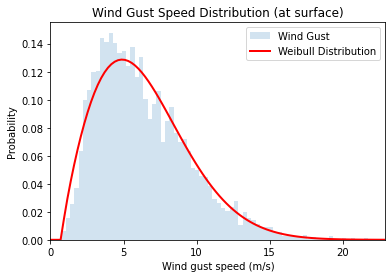

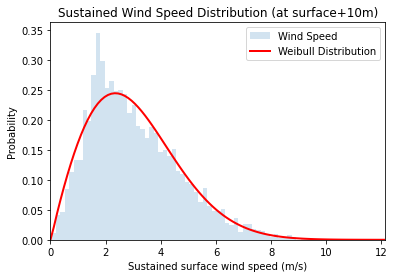

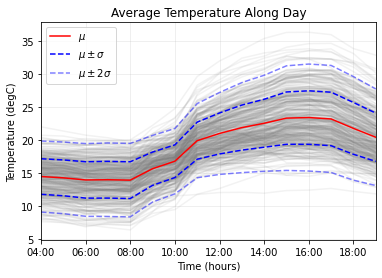

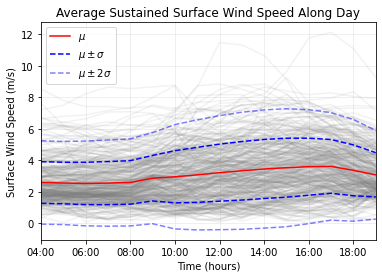

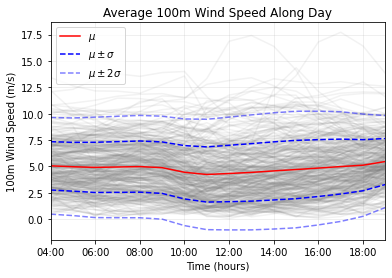

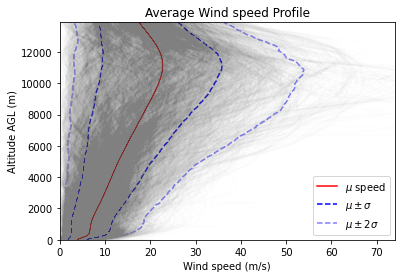

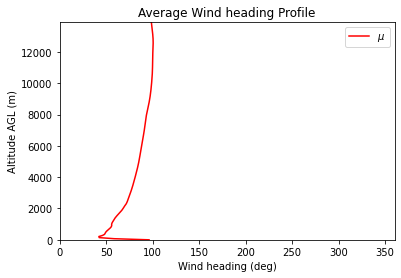

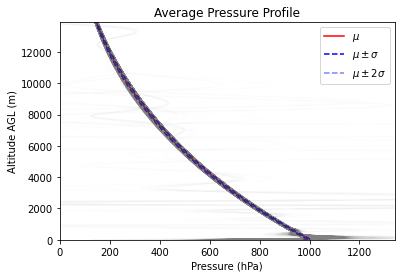

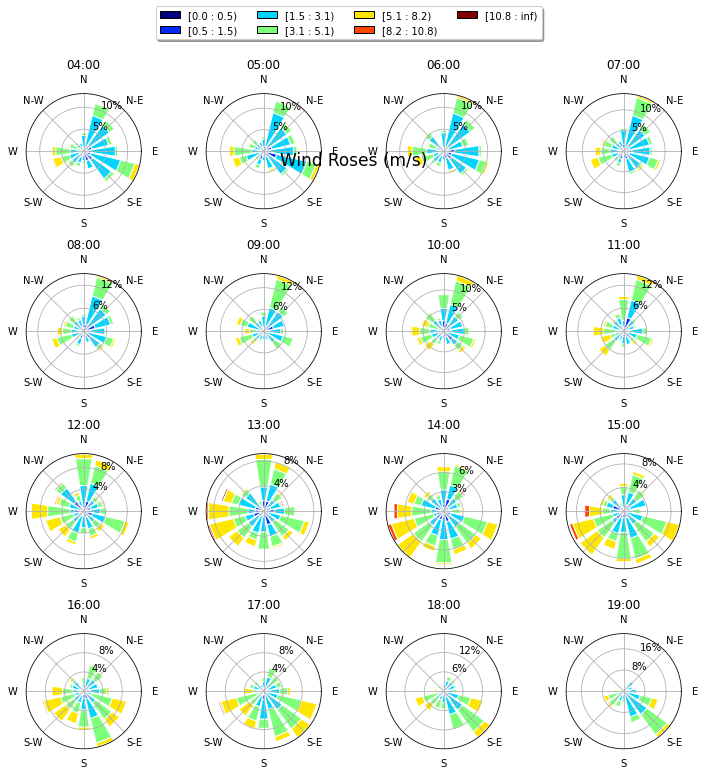

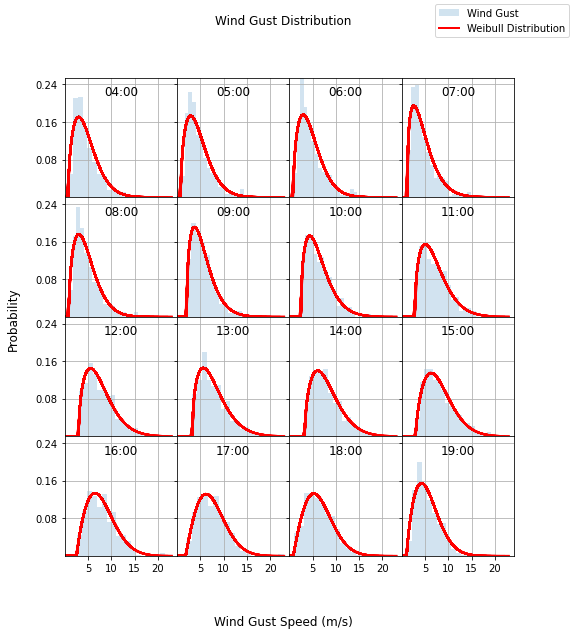

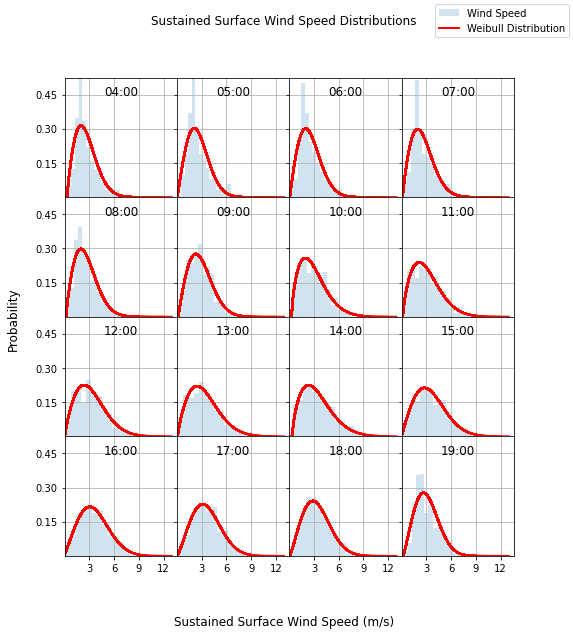

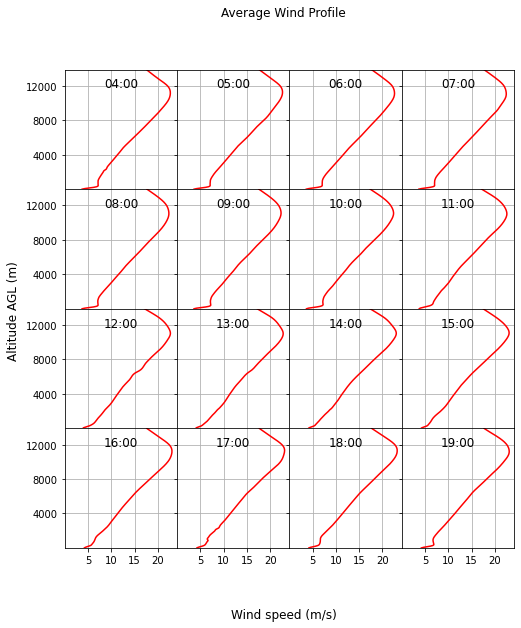

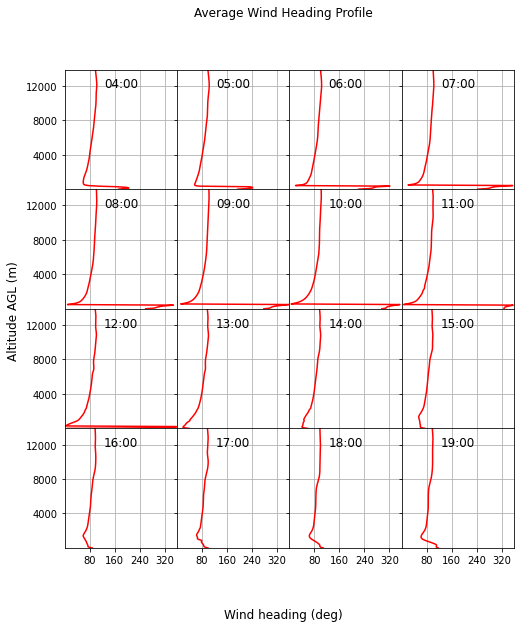

In [5]:
env_analysis.all_info()

It's also important to look at the variation of temperature and wind distribution throught a typical day, which can be easily done by running the next code cells:


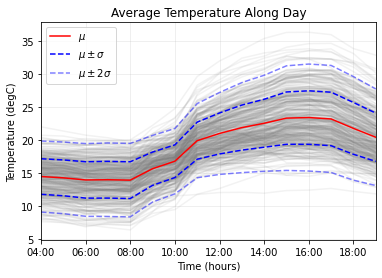

In [6]:
env_analysis.plots.average_surface_temperature_evolution()

We can also take a look at sustained surface wind and wind gust plots!


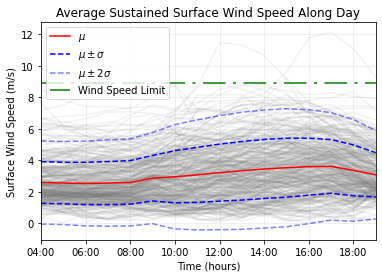

In [10]:
env_analysis.plots.average_surface10m_wind_speed_evolution(wind_speed_limit=True)

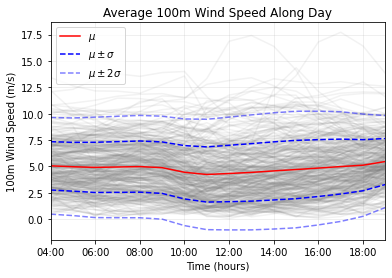

In [11]:
# help(env_analysis.plots.average_surface100m_wind_speed_evolution)
env_analysis.plots.average_surface100m_wind_speed_evolution()

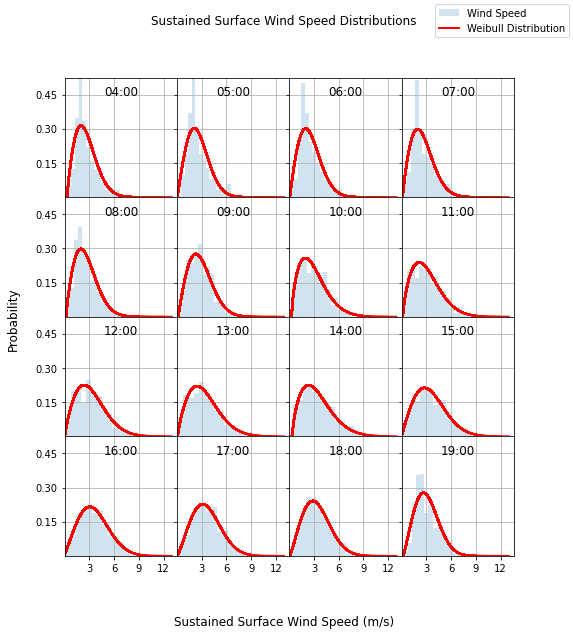

In [12]:
# help(EnvironmentAnalysis.plots.surface_wind_speed_distribution_grid)
env_analysis.plots.surface_wind_speed_distribution_grid()

In [13]:
env_analysis.plots.animate_surface_wind_speed_distribution()

In [14]:
env_analysis.plots.animate_wind_gust_distribution()

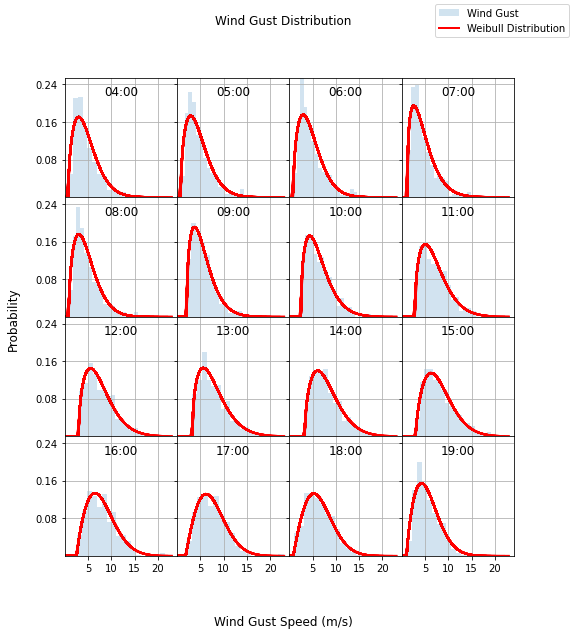

In [15]:
env_analysis.plots.wind_gust_distribution_grid()

The next cell will plot wind gust distribution summarized by every date and every hour available in the source file


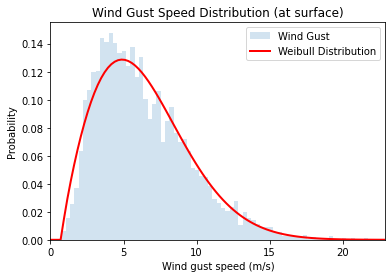

In [16]:
env_analysis.plots.wind_gust_distribution()

## Wind Roses


Finally, we can use the previous informations to generate a graphic known as Wind Rose. A Wind Rose is commonly used by meteorologists to identify how wind speed and direction are typically distributed at a particular location. Using a polar coordinate system of gridding, the frequency of winds over a time period is plotted by wind direction, with color bands showing wind speed ranges. These color bands follow the Beaufort wind force scale. The direction of the longest spoke shows the wind direction with the greatest frequency.

**Note**: Wind Roses plot wind direction, which means the **direction** from which the wind is blowing, not to be confused with wind **heading**, which is the direction to which the wind blows.


In [17]:
# help(EnvironmentAnalysis.animate_average_wind_rose)
env_analysis.plots.animate_average_wind_rose(filename="wind_rose.gif")

Image(value=b'GIF89a\xf4\x01\xf4\x01\x87\x00\x00\xfe\xfe\xfe\x00\xd4\xfe}\xfez\xfe\xe6\x00\xb2\xb3\xb3\xe7\xe7…

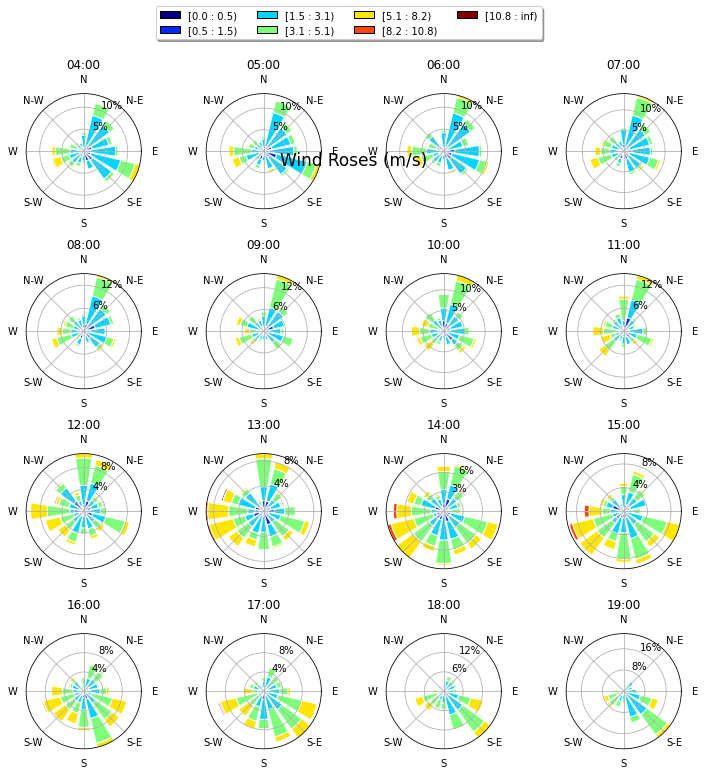

In [18]:
env_analysis.plots.average_wind_rose_grid()

In [19]:
# In case you need to plot only a single windrose with regards to a specific hour
# env_analysis.plots.average_wind_rose_specific_hour(10)

## Pressure Level Analysis


At this section, we guide our analysis through pressure profile data available on our dataset.
It means we are now stopping to see just surface information and start better understaand how the meteorology varies while the altitude increases.


Moreover, we can see an animation of how the wind speed profile varies during an average day at Spaceport Location:


In [20]:
env_analysis.plots.animate_wind_speed_profile(clear_range_limits=True)

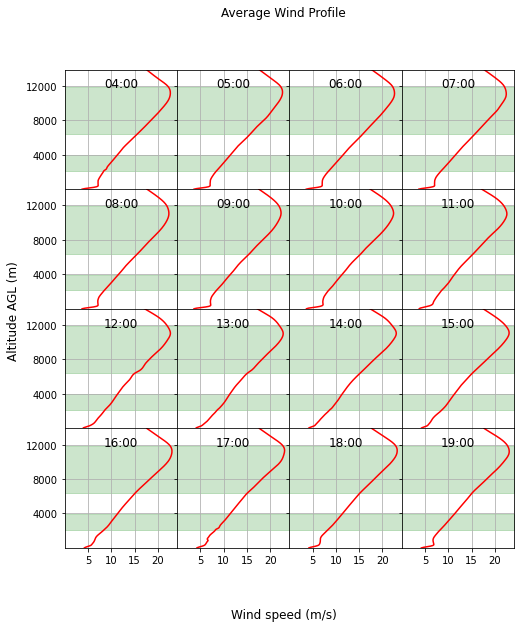

In [21]:
env_analysis.plots.wind_speed_profile_grid(clear_range_limits=True)

Finally, the average wind speed and pressure profile can be summarized by every date end hour available in our source file:


C:\Users\mateu\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


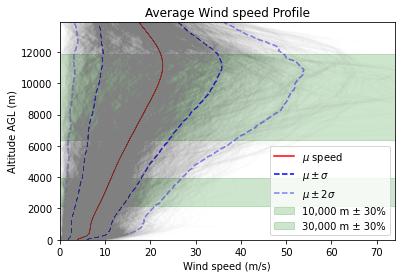

In [22]:
env_analysis.plots.average_wind_speed_profile(clear_range_limits=True)

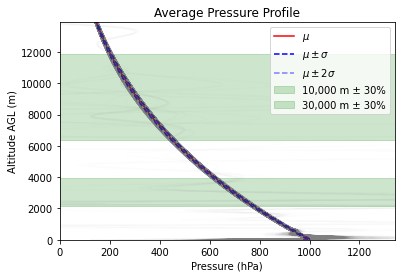

In [23]:
env_analysis.plots.average_pressure_profile(clear_range_limits=True)

## Export Environment


Here we can export the mean Profiles to be used in RocketPy trajectory simulations


In [24]:
# env_analysis.export_mean_profiles()